# Explore comparing Feature Engineering: 

In [1]:
# imports:
import pandas as pd
import numpy as np
import wrangle as wr

# vizualizations
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats

# warnings:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# acquire dataframe: 
df = wr.acquire_water()

In [3]:
# clean dataframe: 
df = wr.prep_water(df)

In [4]:
# create bins: 
df = wr.safe_water(df)

In [5]:
# more bins:
df = wr.water_range(df)

In [6]:
df.head()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability,...,turbidity_range,ph_level,hardness_level,solids_level,chloramines_level,sulfate_level,conductivity_level,oraganic_level,trihalomethanes_level,turbidity_level
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0,...,safe,low,medium,low,low,low,high,medium,low,medium
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0,...,safe,low,medium,medium,medium,medium,high,medium,high,medium
5,5.58,188.31,28748.69,7.54,326.68,280.47,8.40,54.92,2.56,0,...,safe,medium,medium,low,medium,medium,high,high,medium,high
6,10.22,248.07,28749.72,7.51,393.66,283.65,13.79,84.60,2.67,0,...,safe,low,medium,low,medium,low,high,medium,low,high
7,8.64,203.36,13672.09,4.56,303.31,474.61,12.36,62.80,4.40,0,...,safe,low,medium,medium,medium,medium,medium,medium,medium,medium


In [7]:
# split up the x variables into categorical and numerical:
cat_cols, num_cols = [], []
# for a column in the X_train data frame:
for col in df.columns:
    # if the column is an object:
    if df[col].dtype == 'O':
        # add the column to the category list
        cat_cols.append(col)
    # else not an object:   
    else:
        # if the column has unique values under 10:
        if df[col].nunique() < 10:
            # add the columns to category list
            cat_cols.append(col)
        # else not object and unique is not under 10:
        else:
            # and the column to the numbers list
            num_cols.append(col)

In [24]:
cat_cols

['potability',
 'ph_range',
 'hardness_range',
 'solids_range',
 'chloramines_range',
 'sulfate_range',
 'conductivity_rage',
 'organic_car_range',
 'trihalomethanes_range',
 'turbidity_range',
 'ph_level',
 'hardness_level',
 'solids_level',
 'chloramines_level',
 'sulfate_level',
 'conductivity_level',
 'oraganic_level',
 'trihalomethanes_level',
 'turbidity_level']

Frequncy of potability
count    2011.000000
mean        0.403282
std         0.490678
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: potability, dtype: float64
0    1200
1     811
Name: potability, dtype: int64


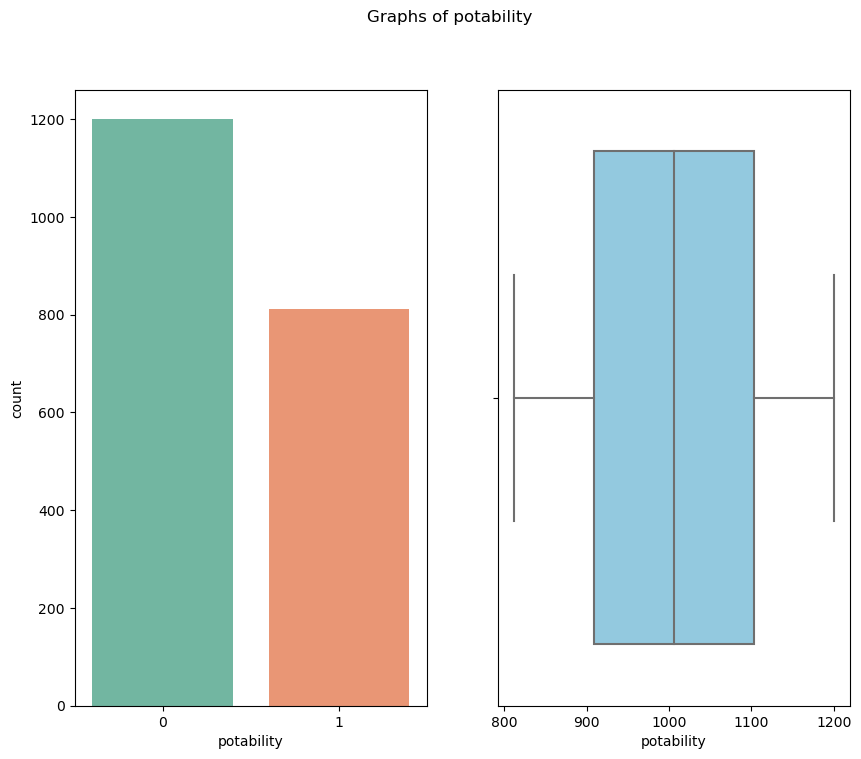

----------###---------
Frequncy of ph_range
count     2011
unique       3
top       safe
freq       958
Name: ph_range, dtype: object
safe      958
acidic    695
basic     358
Name: ph_range, dtype: int64


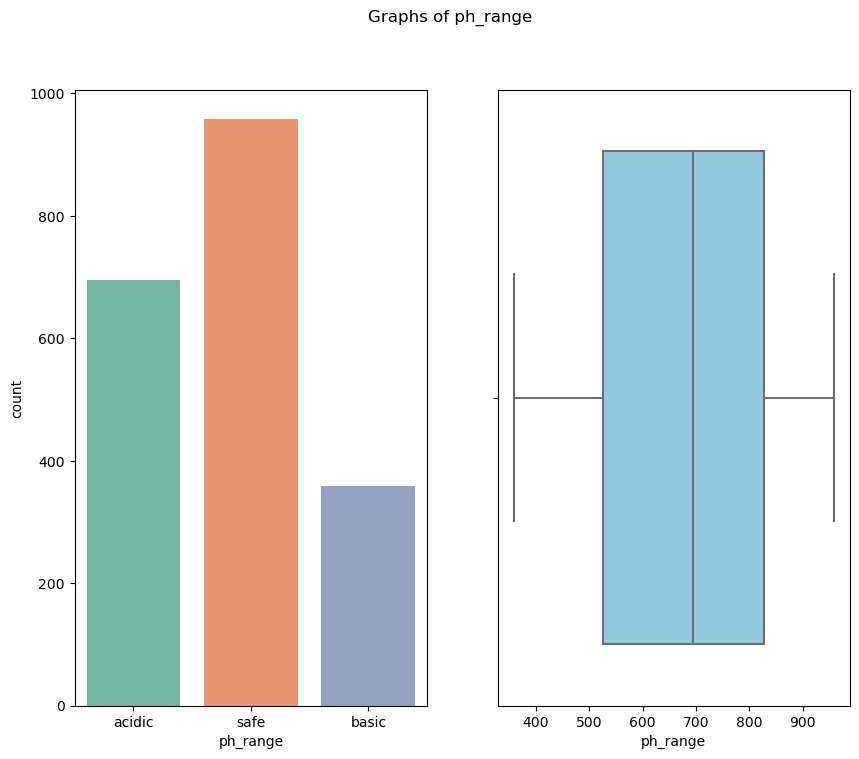

----------###---------
Frequncy of hardness_range
count          2011
unique            3
top       very_hard
freq           1433
Name: hardness_range, dtype: object
very_hard          1433
hard                547
moderately_hard      31
soft                  0
slightly_hard         0
Name: hardness_range, dtype: int64


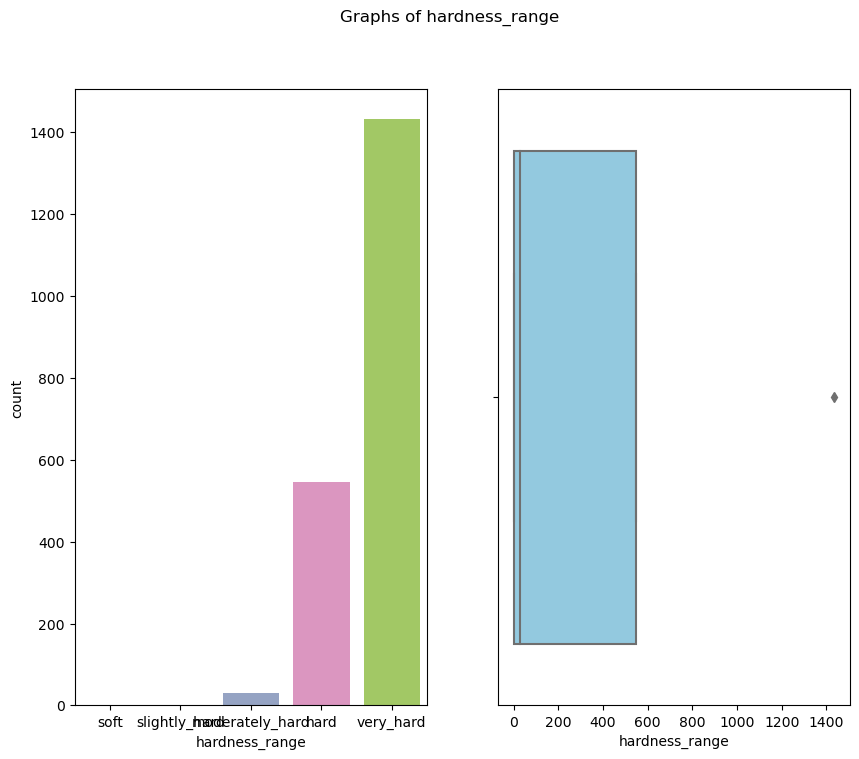

----------###---------
Frequncy of solids_range
count             2011
unique               3
top       unacceptable
freq              2009
Name: solids_range, dtype: object
unacceptable    2009
good               1
poor               1
excellent          0
fair               0
Name: solids_range, dtype: int64


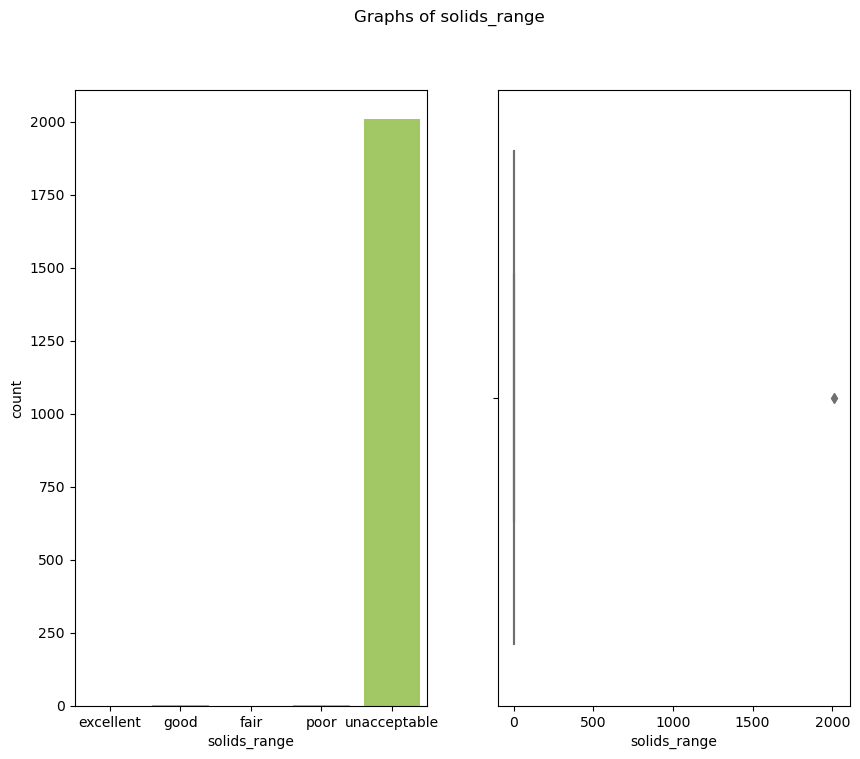

----------###---------
Frequncy of chloramines_range
count     2011
unique       2
top       high
freq      1952
Name: chloramines_range, dtype: object
high    1952
safe      59
Name: chloramines_range, dtype: int64


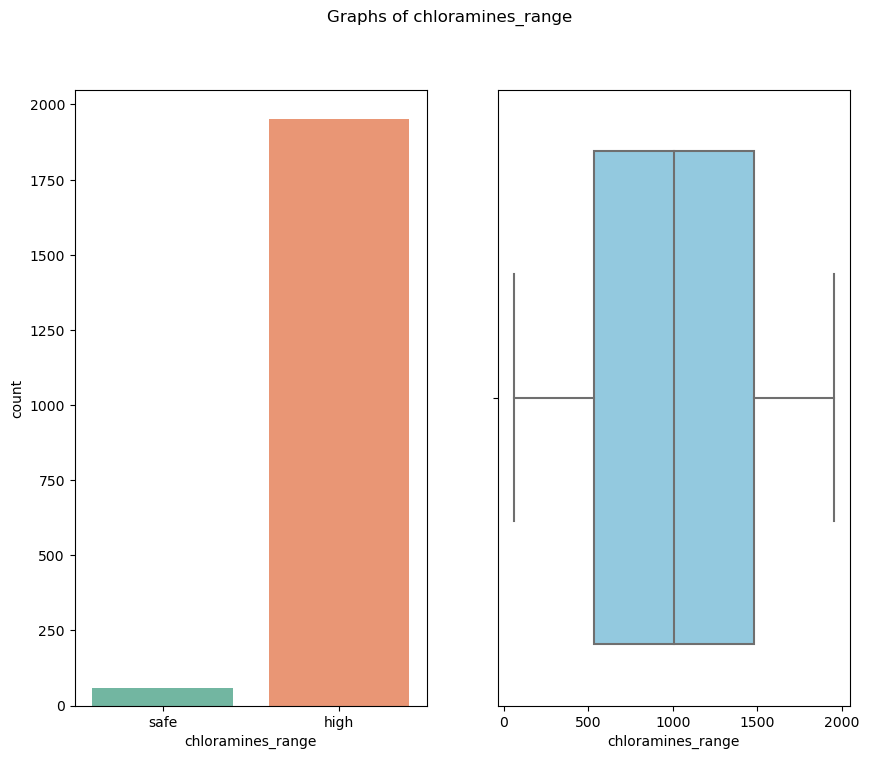

----------###---------
Frequncy of sulfate_range
count     2011
unique       2
top       high
freq      1964
Name: sulfate_range, dtype: object
high    1964
safe      47
Name: sulfate_range, dtype: int64


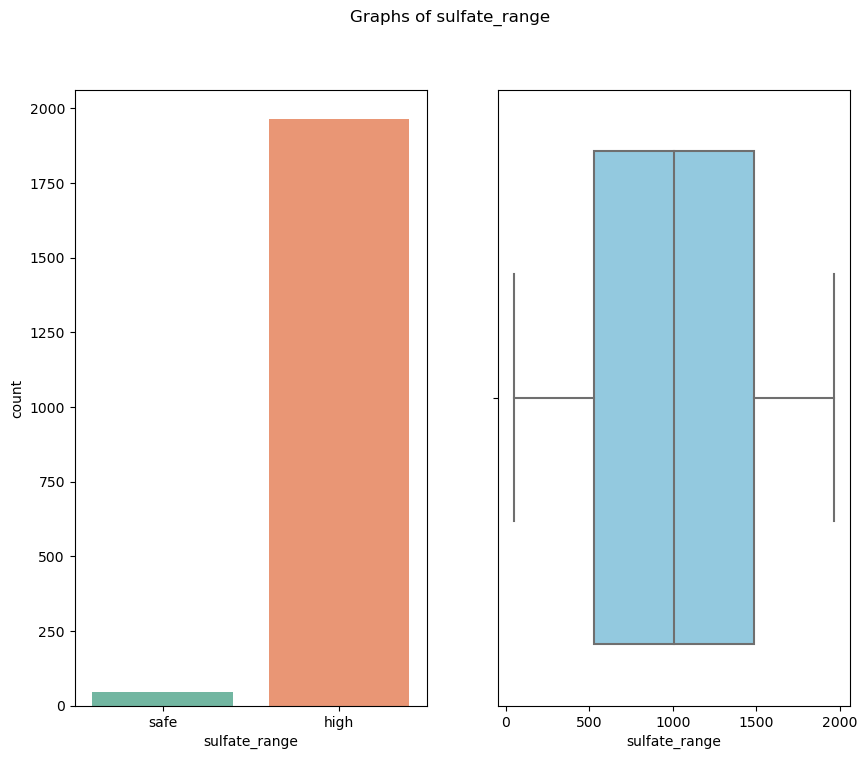

----------###---------
Frequncy of conductivity_rage
count     2011
unique       2
top       high
freq      1216
Name: conductivity_rage, dtype: object
high    1216
safe     795
Name: conductivity_rage, dtype: int64


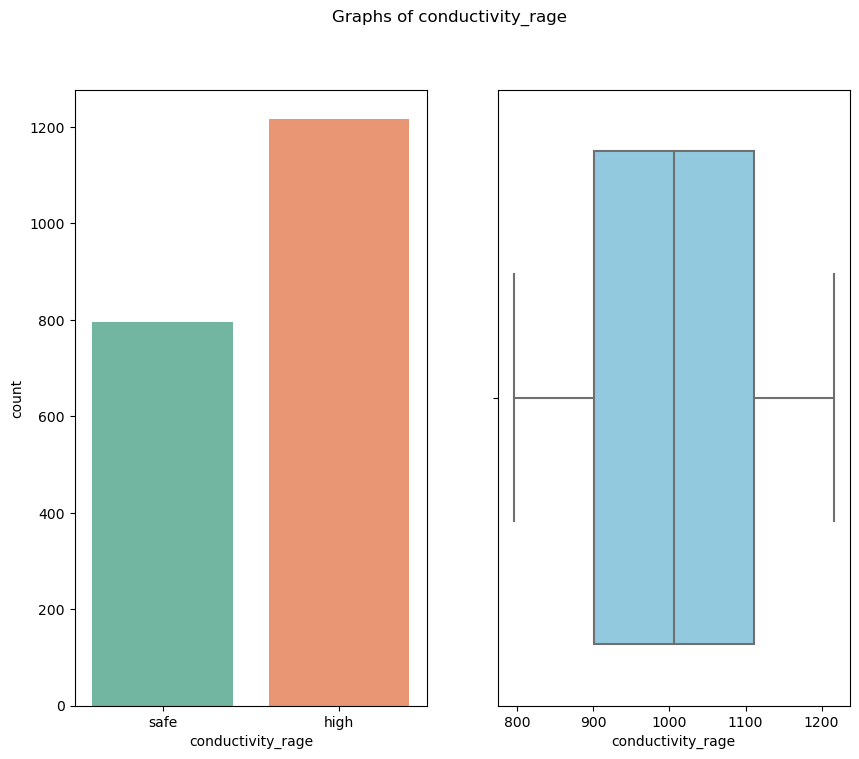

----------###---------
Frequncy of organic_car_range
count     2011
unique       2
top       high
freq      2010
Name: organic_car_range, dtype: object
high    2010
safe       1
Name: organic_car_range, dtype: int64


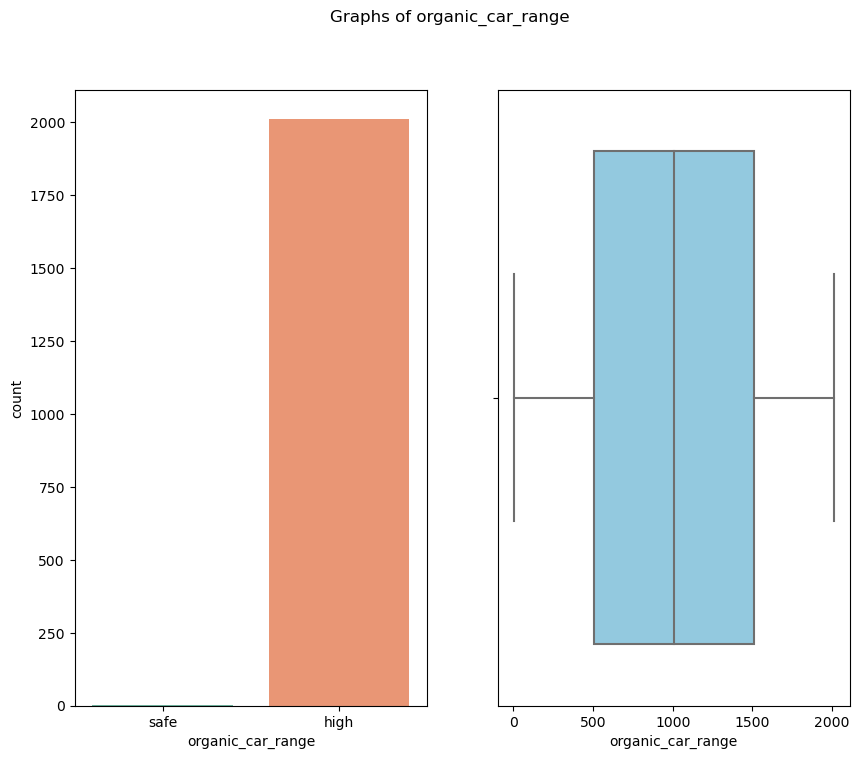

----------###---------
Frequncy of trihalomethanes_range
count     2011
unique       2
top       safe
freq      1623
Name: trihalomethanes_range, dtype: object
safe    1623
high     388
Name: trihalomethanes_range, dtype: int64


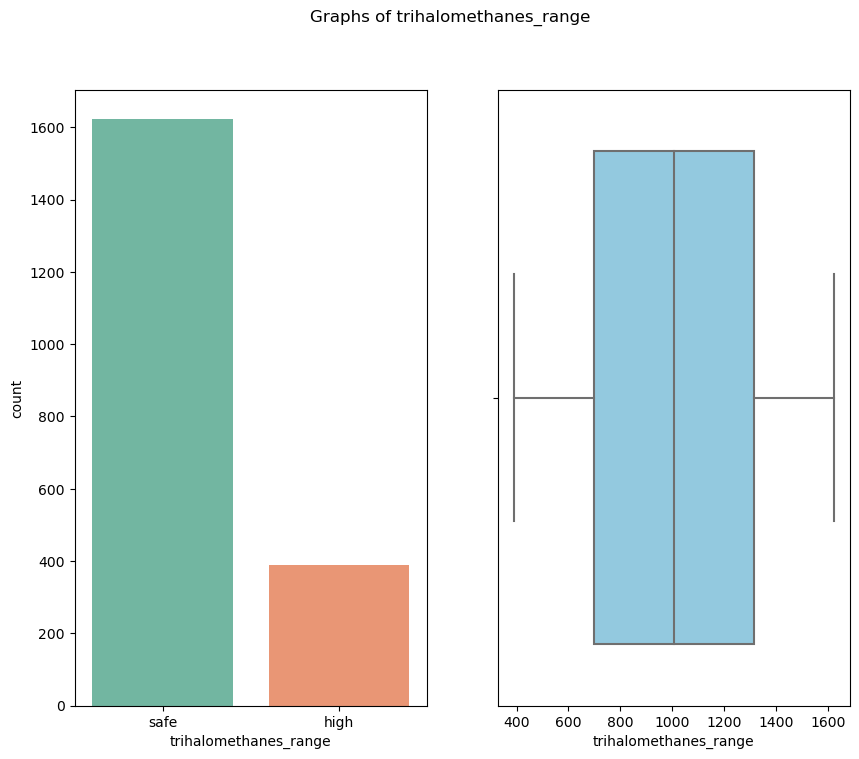

----------###---------
Frequncy of turbidity_range
count     2011
unique       2
top       safe
freq      1830
Name: turbidity_range, dtype: object
safe    1830
high     181
Name: turbidity_range, dtype: int64


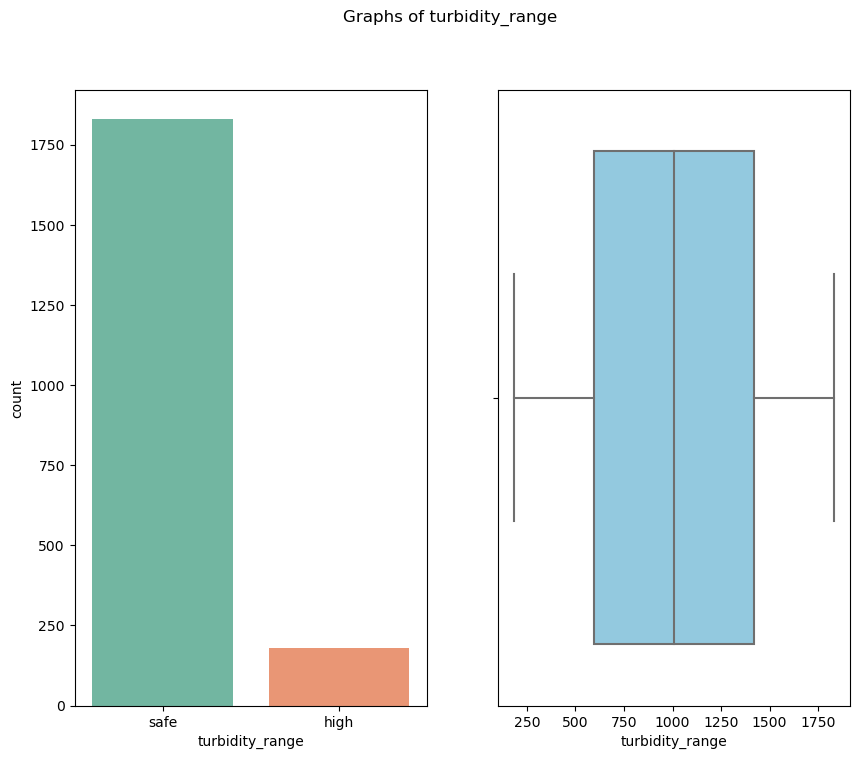

----------###---------
Frequncy of ph_level
count     2011
unique       3
top        low
freq      1018
Name: ph_level, dtype: object
low       1018
medium     943
high        50
Name: ph_level, dtype: int64


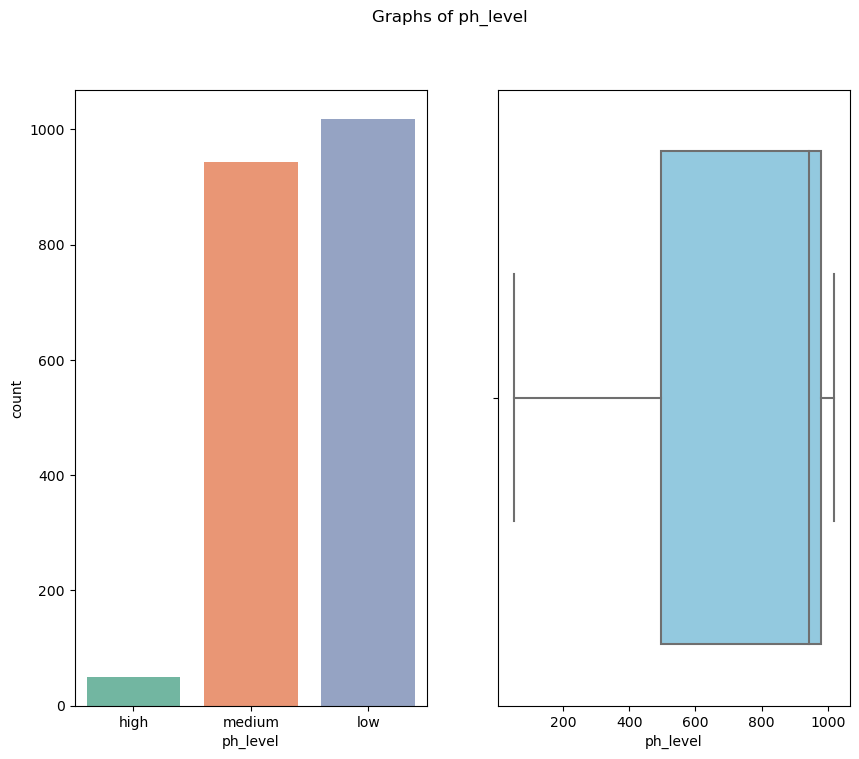

----------###---------
Frequncy of hardness_level
count       2010
unique         3
top       medium
freq        1768
Name: hardness_level, dtype: object
medium    1768
high       151
low         91
Name: hardness_level, dtype: int64


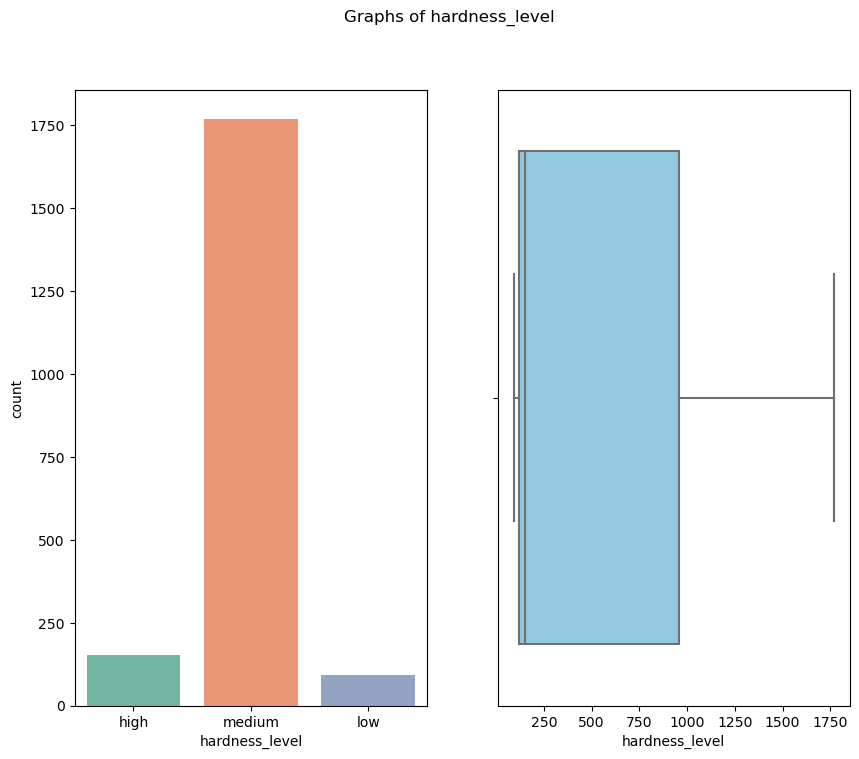

----------###---------
Frequncy of solids_level
count     2010
unique       3
top        low
freq      1091
Name: solids_level, dtype: object
low       1091
medium     799
high       120
Name: solids_level, dtype: int64


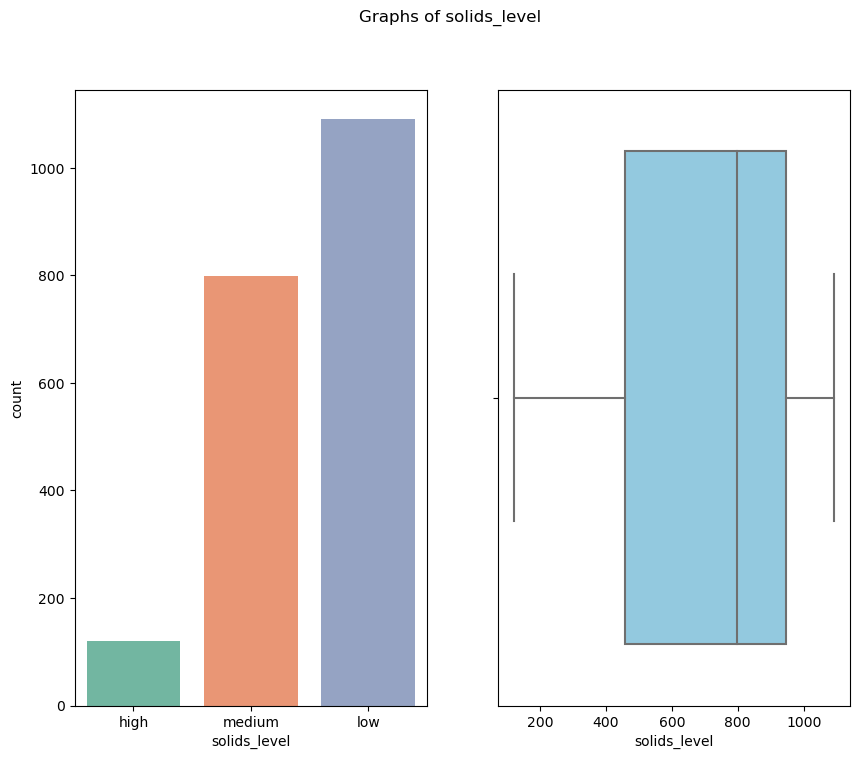

----------###---------
Frequncy of chloramines_level
count       2010
unique         3
top       medium
freq        1401
Name: chloramines_level, dtype: object
medium    1401
low        551
high        58
Name: chloramines_level, dtype: int64


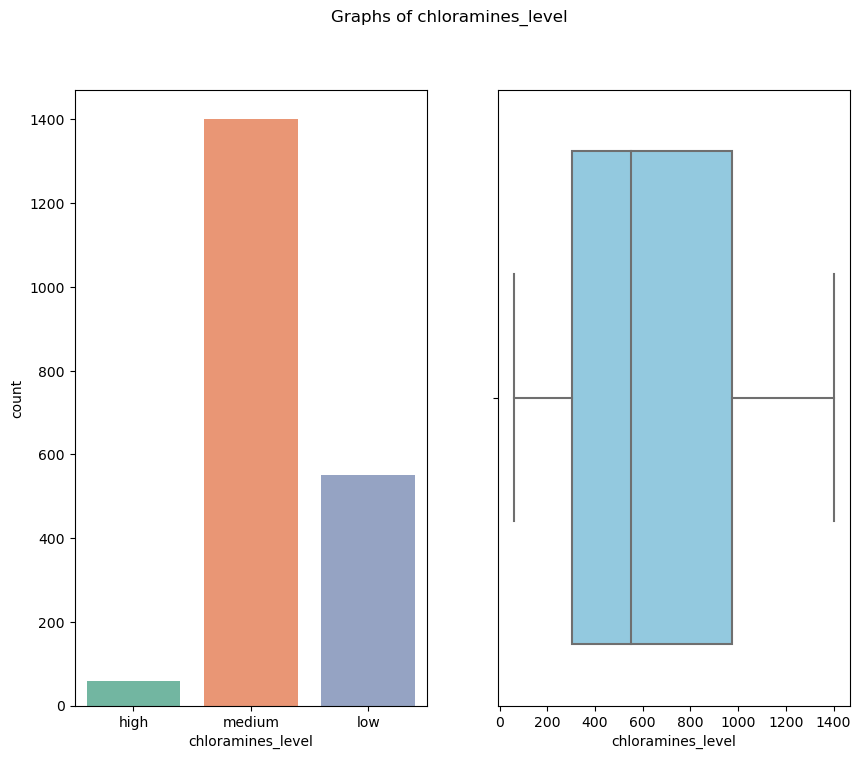

----------###---------
Frequncy of sulfate_level
count       2010
unique         3
top       medium
freq        1315
Name: sulfate_level, dtype: object
medium    1315
low        649
high        46
Name: sulfate_level, dtype: int64


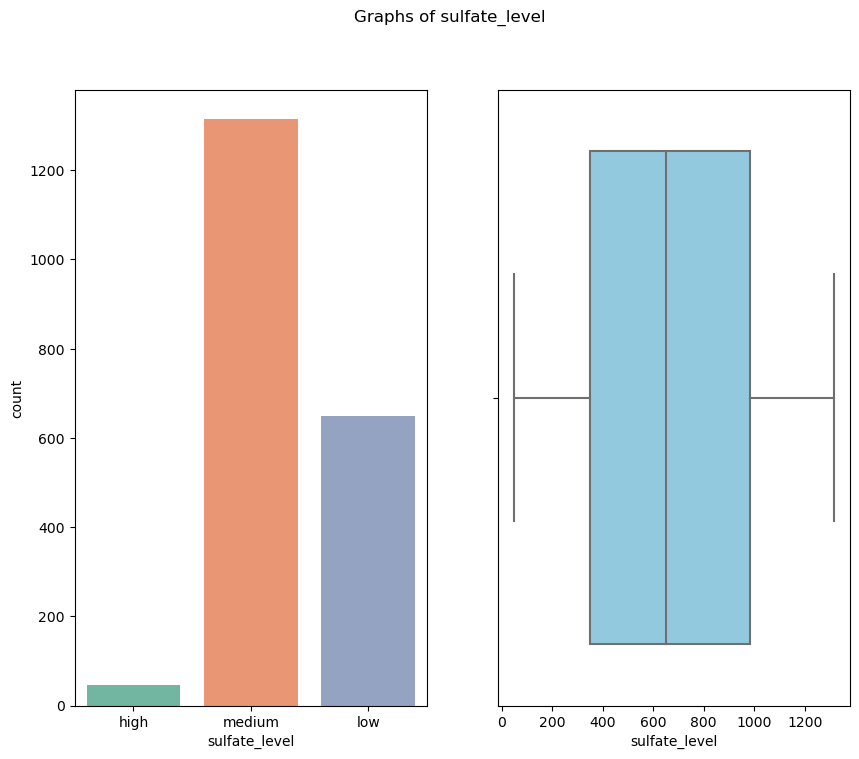

----------###---------
Frequncy of conductivity_level
count       2010
unique         3
top       medium
freq        1179
Name: conductivity_level, dtype: object
medium    1179
high       794
low         37
Name: conductivity_level, dtype: int64


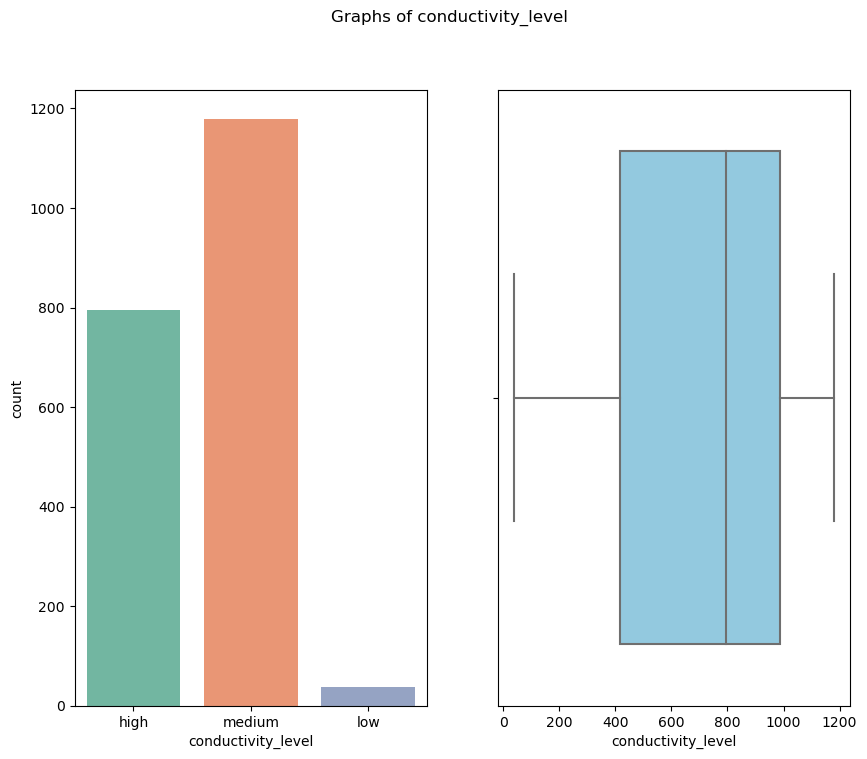

----------###---------
Frequncy of oraganic_level
count       2010
unique         3
top       medium
freq        1743
Name: oraganic_level, dtype: object
medium    1743
high       188
low         79
Name: oraganic_level, dtype: int64


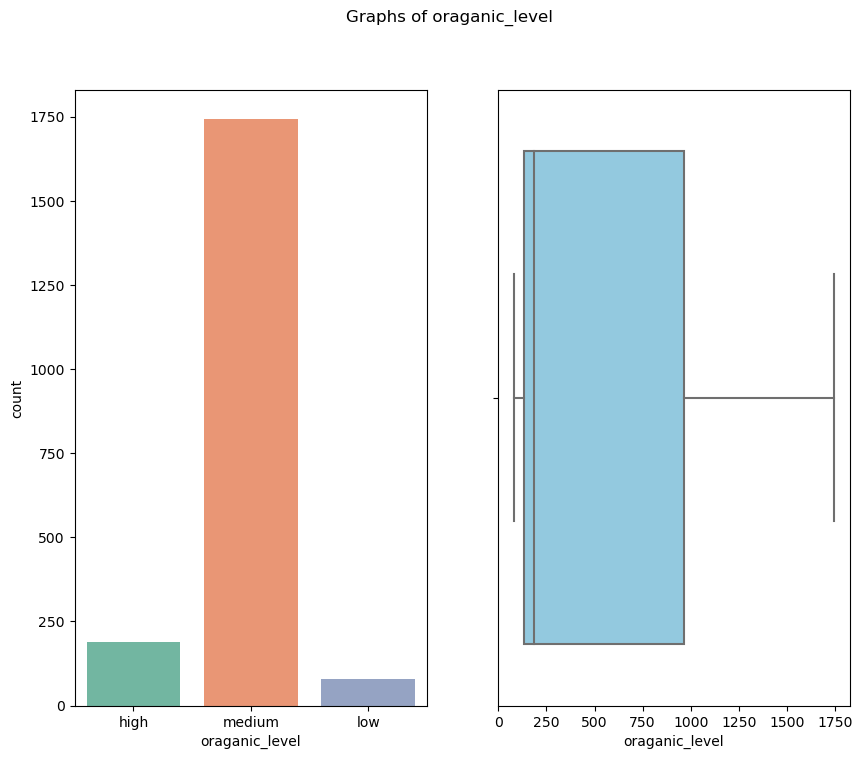

----------###---------
Frequncy of trihalomethanes_level
count       2010
unique         3
top       medium
freq        1316
Name: trihalomethanes_level, dtype: object
medium    1316
low        388
high       306
Name: trihalomethanes_level, dtype: int64


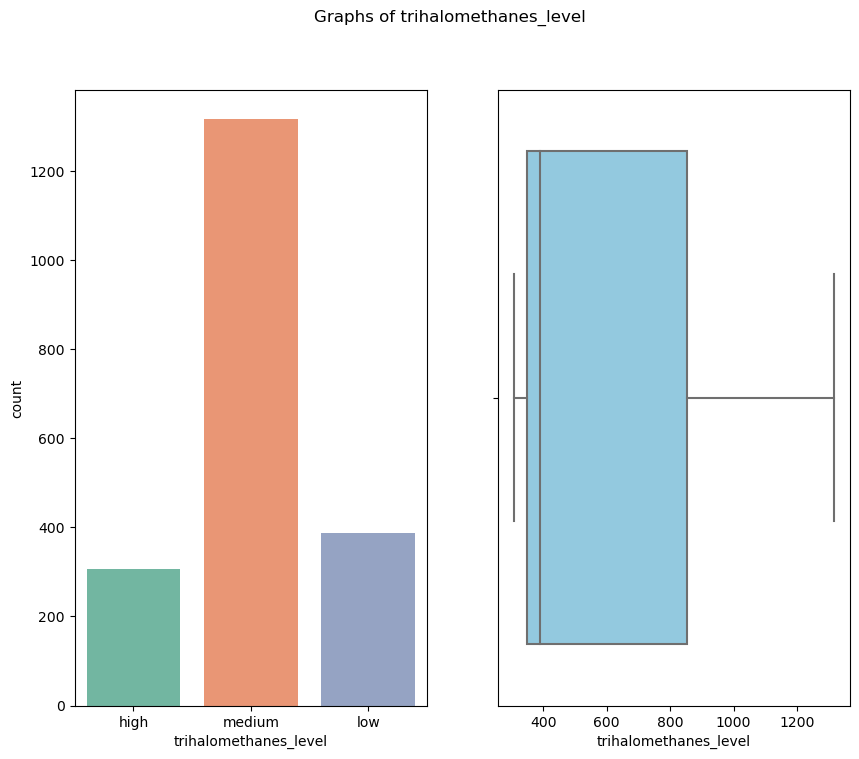

----------###---------
Frequncy of turbidity_level
count       2010
unique         3
top       medium
freq        1597
Name: turbidity_level, dtype: object
medium    1597
high       232
low        181
Name: turbidity_level, dtype: int64


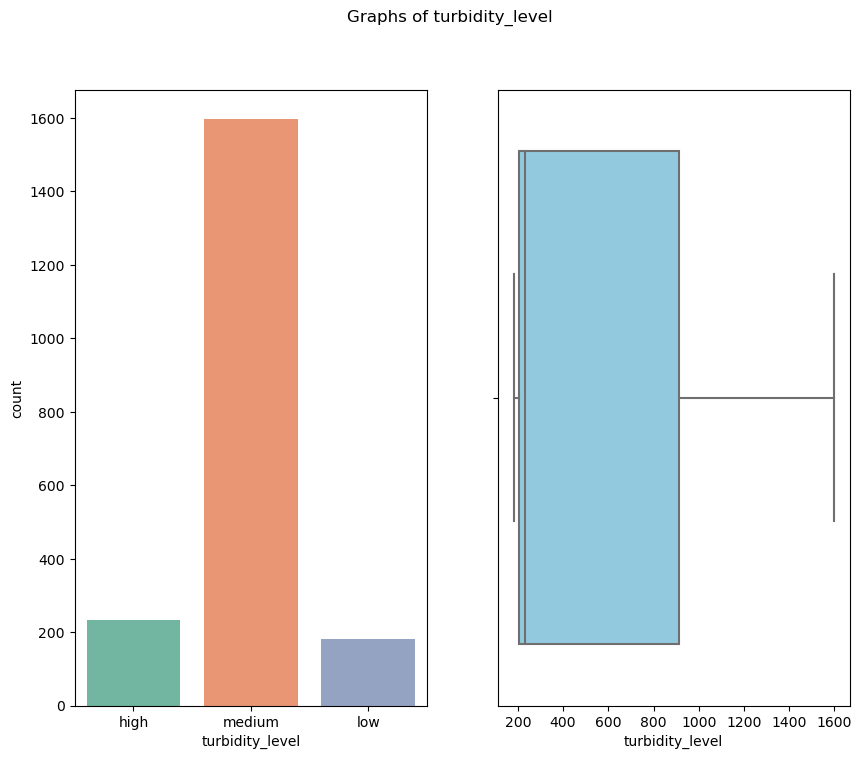

----------###---------


In [8]:
# only exploring the new columns
for col in cat_cols:
    print(f'Frequncy of {col}')
    print(df[col].describe())
    print(df[col].value_counts())
    
    #since there are multiple columns i want them to display side by side
    fig, ax = plt.subplots(1,2, figsize=(10,8))
    fig.suptitle(f'Graphs of {col}')
    
    #plot one: 
    sns.countplot(data = df, x = col, ax=ax[0], palette = 'Set2')
    
    #plot two:
    sns.boxplot(ax=ax[1], data = df, x = df[col].value_counts(), color = 'skyblue')

   
    plt.show()
    print('----------###---------')

### Bivariate

In [9]:
# split the data
train, validate, test = wr.split_water(df)

ph_range vs if potability


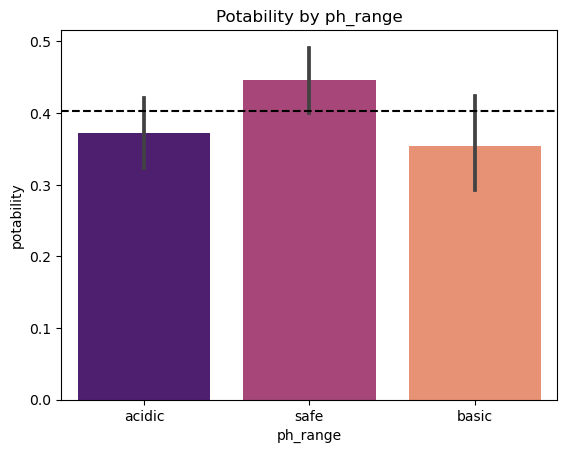

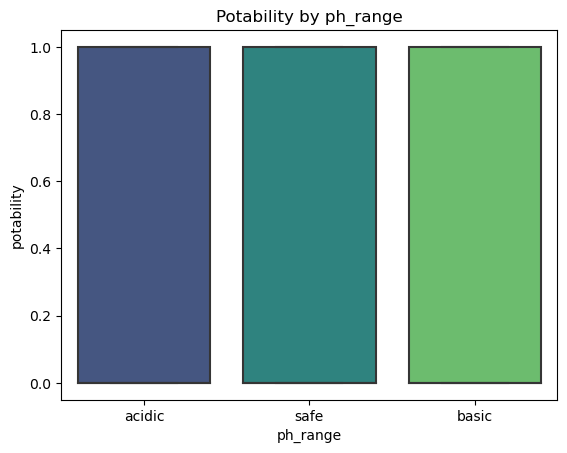

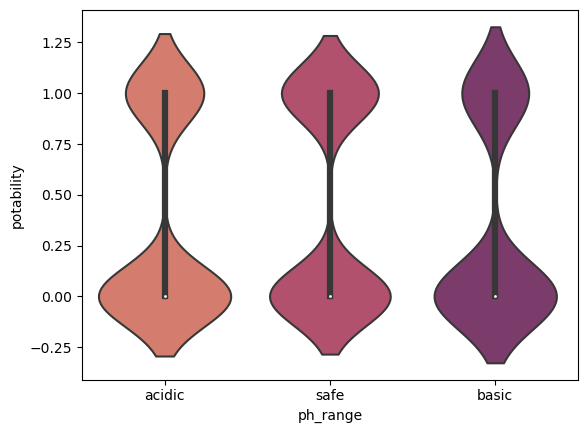

count     1125
unique       3
top       safe
freq       523
Name: ph_range, dtype: object
-------------------------------
hardness_range vs if potability


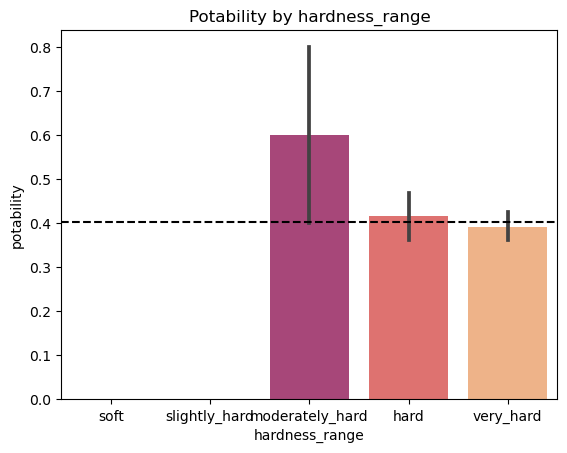

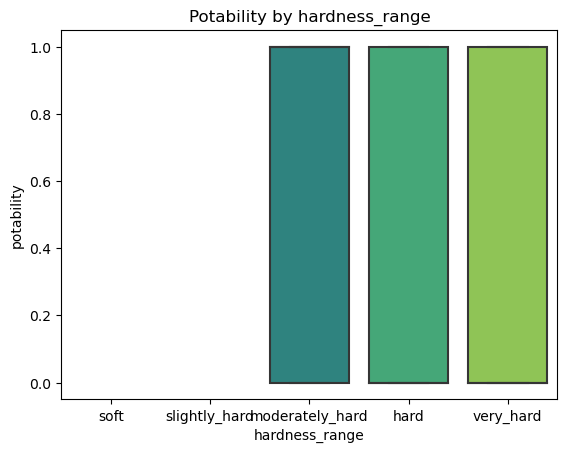

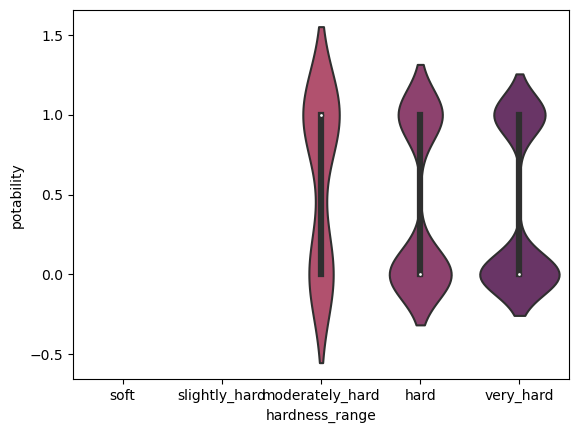

count          1125
unique            3
top       very_hard
freq            805
Name: hardness_range, dtype: object
-------------------------------
solids_range vs if potability


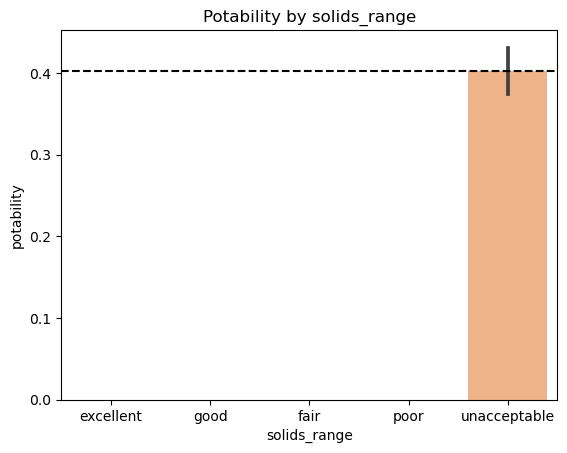

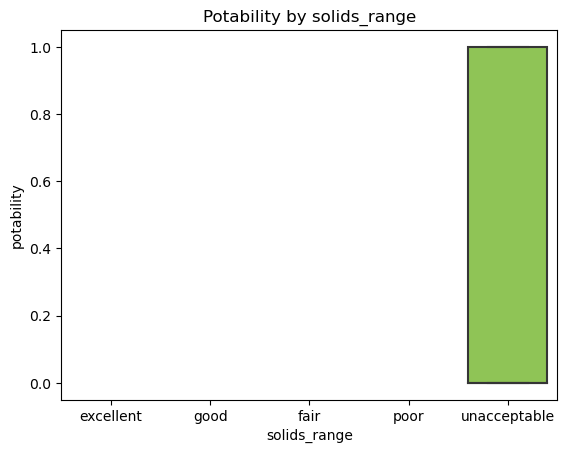

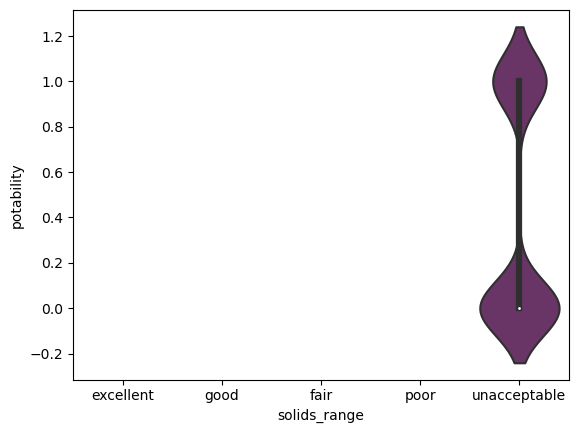

count             1125
unique               1
top       unacceptable
freq              1125
Name: solids_range, dtype: object
-------------------------------
chloramines_range vs if potability


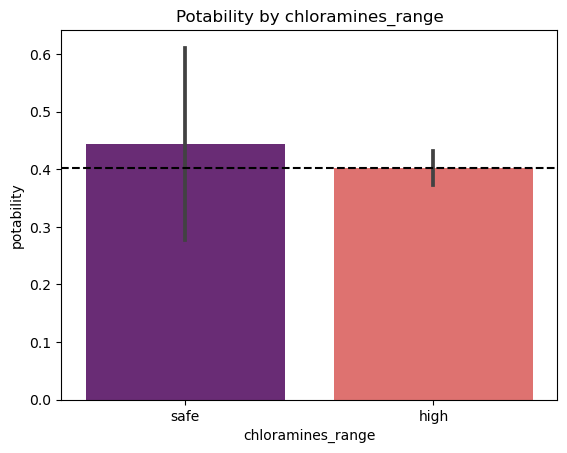

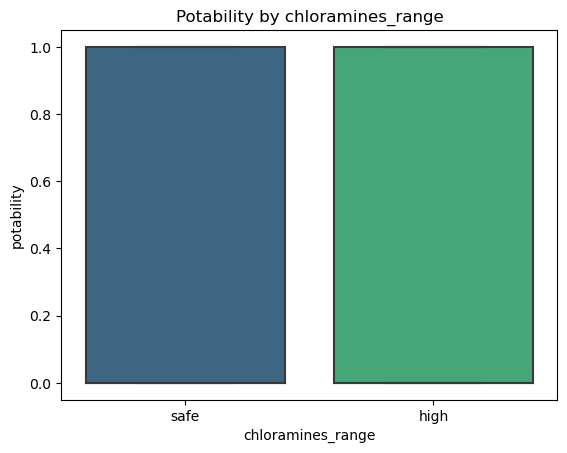

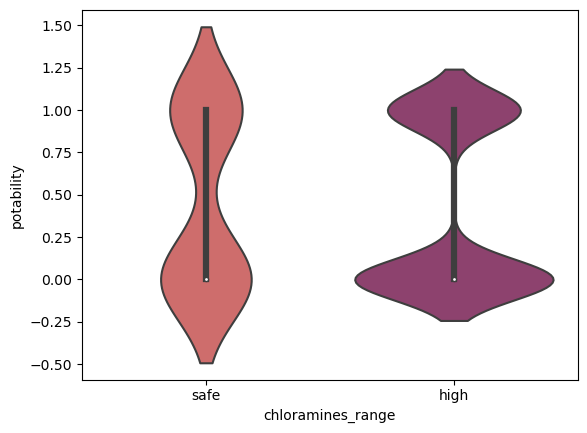

count     1125
unique       2
top       high
freq      1089
Name: chloramines_range, dtype: object
-------------------------------
sulfate_range vs if potability


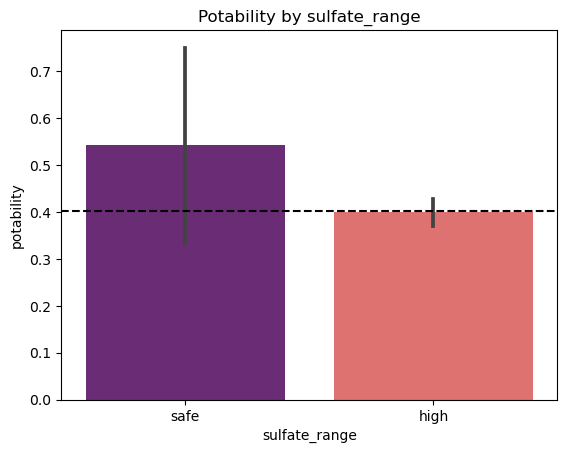

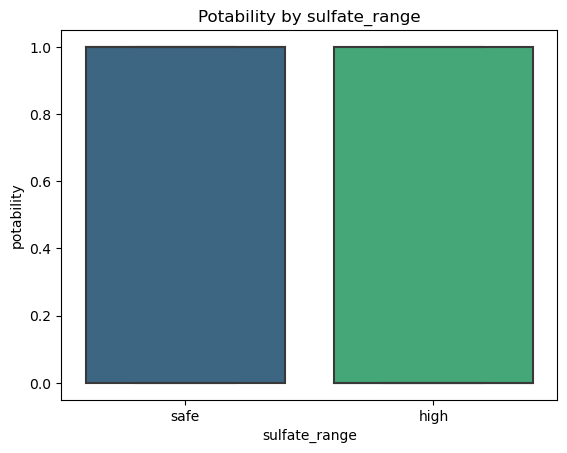

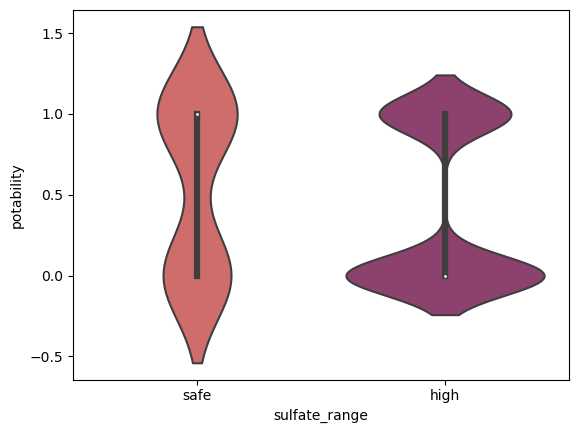

count     1125
unique       2
top       high
freq      1101
Name: sulfate_range, dtype: object
-------------------------------
conductivity_rage vs if potability


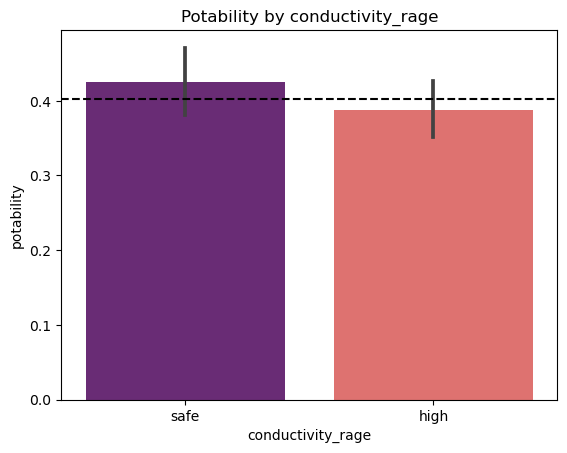

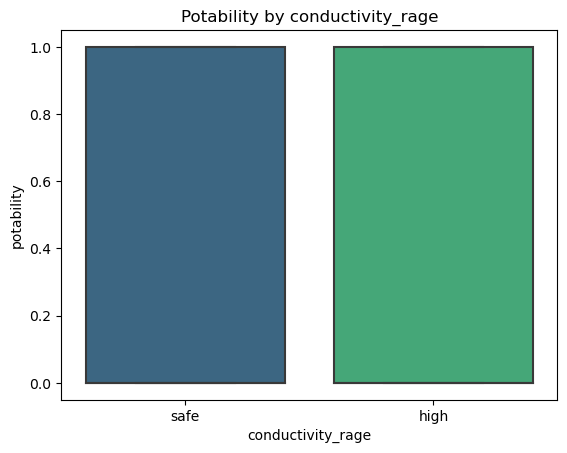

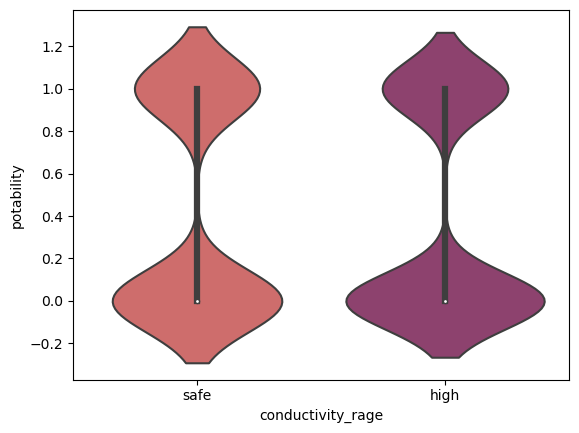

count     1125
unique       2
top       high
freq       673
Name: conductivity_rage, dtype: object
-------------------------------
organic_car_range vs if potability


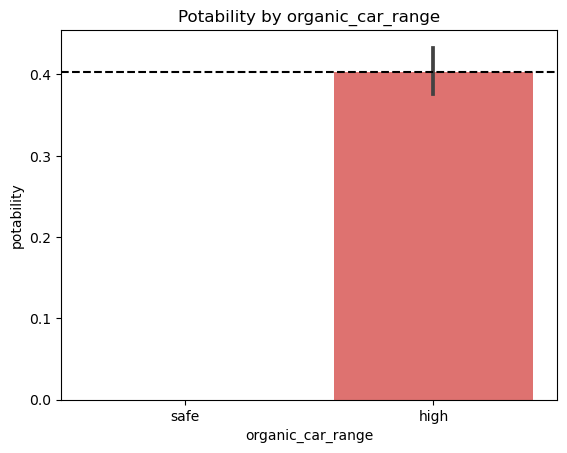

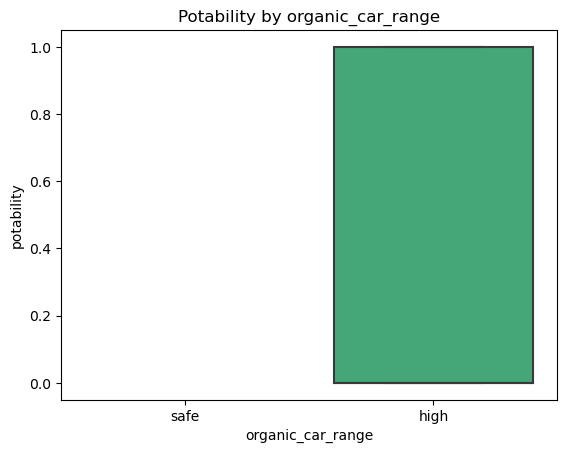

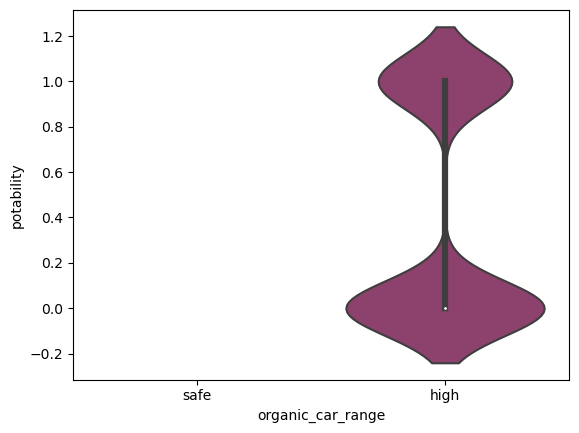

count     1125
unique       1
top       high
freq      1125
Name: organic_car_range, dtype: object
-------------------------------
trihalomethanes_range vs if potability


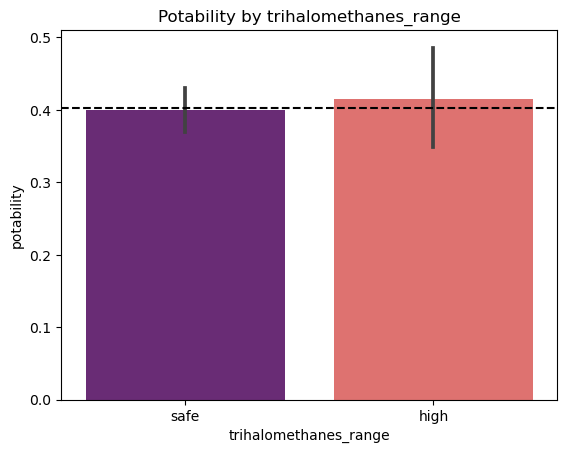

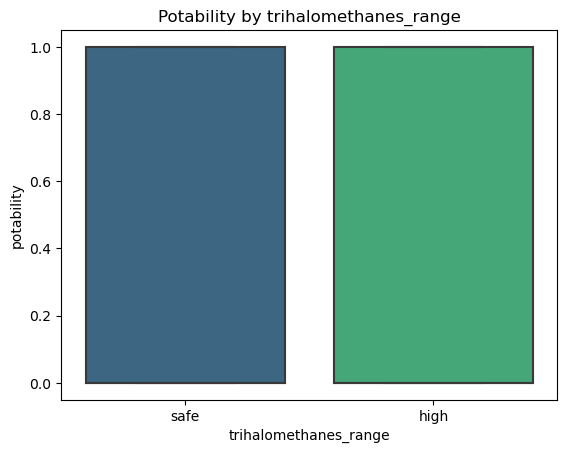

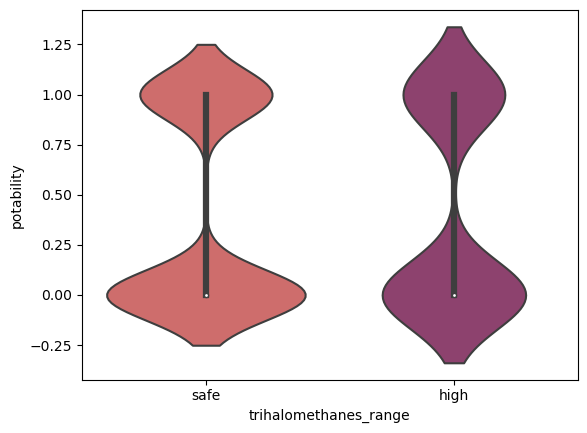

count     1125
unique       2
top       safe
freq       913
Name: trihalomethanes_range, dtype: object
-------------------------------
turbidity_range vs if potability


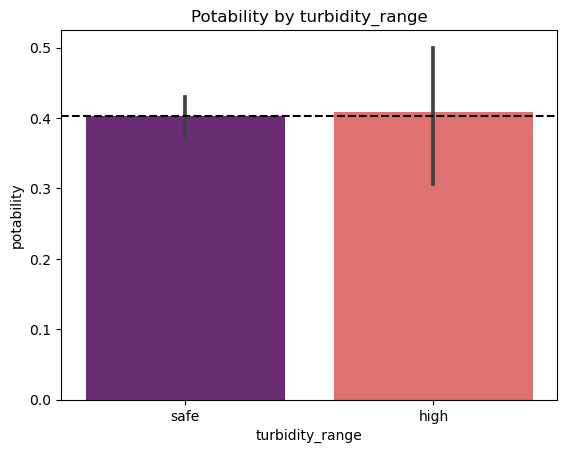

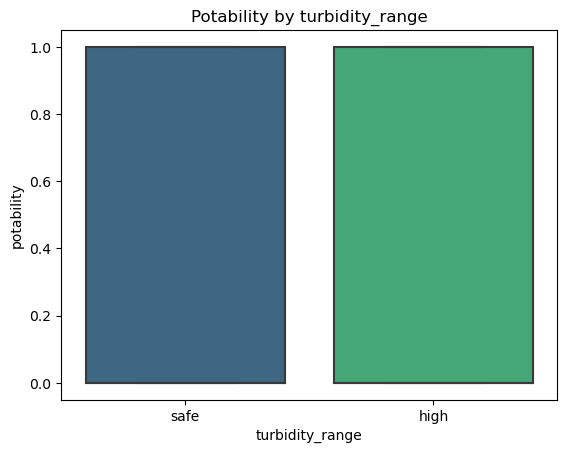

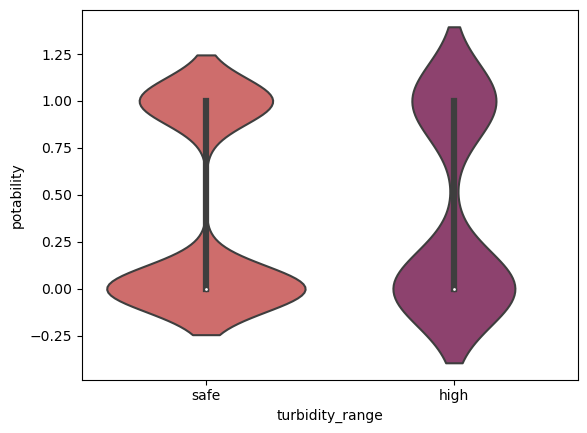

count     1125
unique       2
top       safe
freq      1027
Name: turbidity_range, dtype: object
-------------------------------
ph_level vs if potability


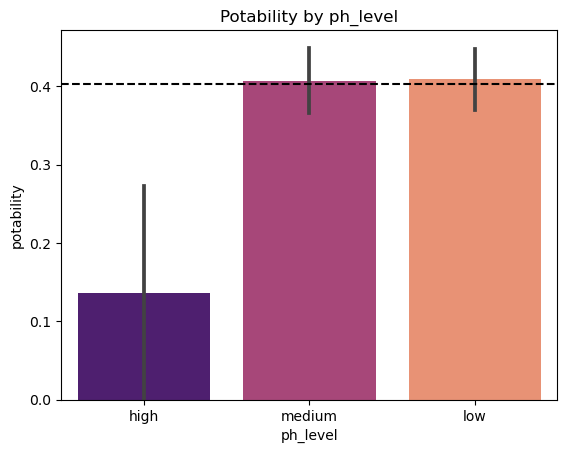

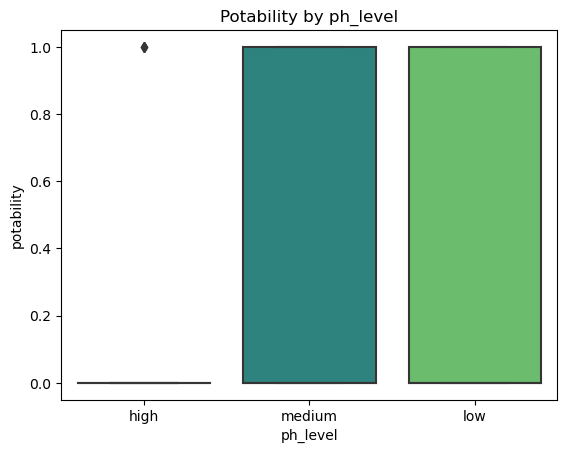

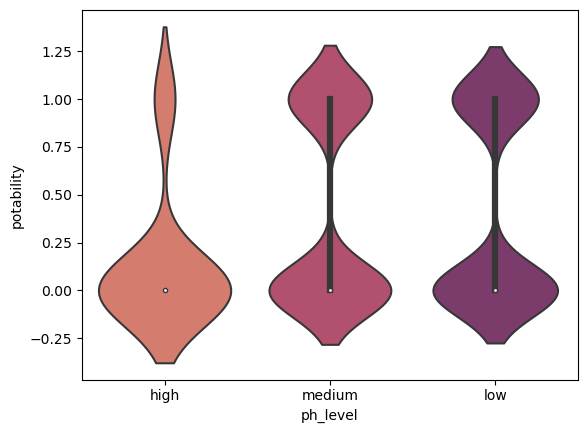

count     1125
unique       3
top        low
freq       589
Name: ph_level, dtype: object
-------------------------------
hardness_level vs if potability


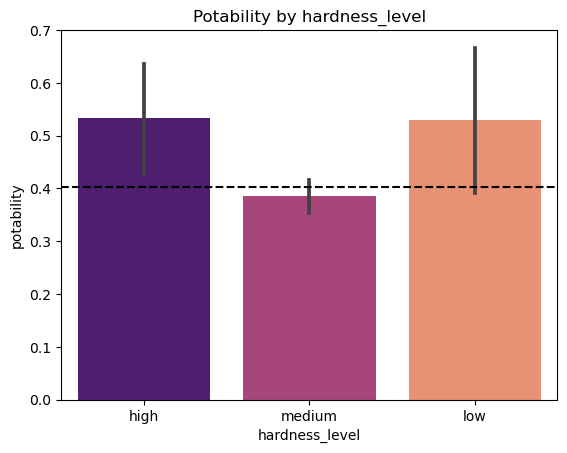

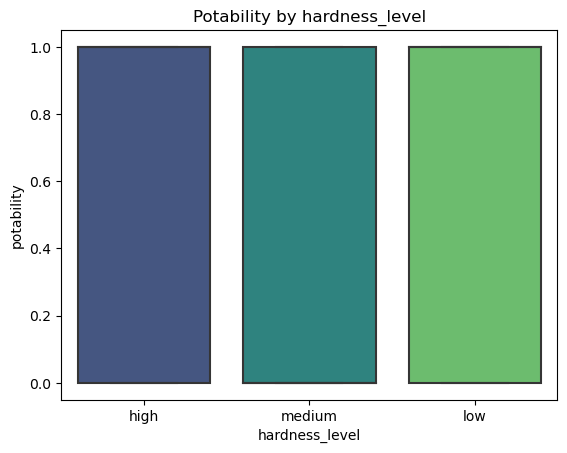

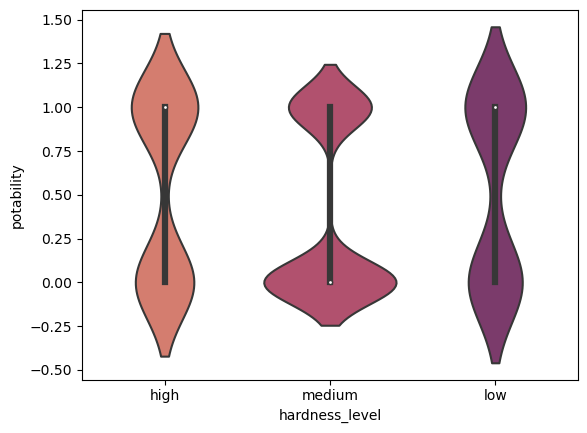

count       1124
unique         3
top       medium
freq         996
Name: hardness_level, dtype: object
-------------------------------
solids_level vs if potability


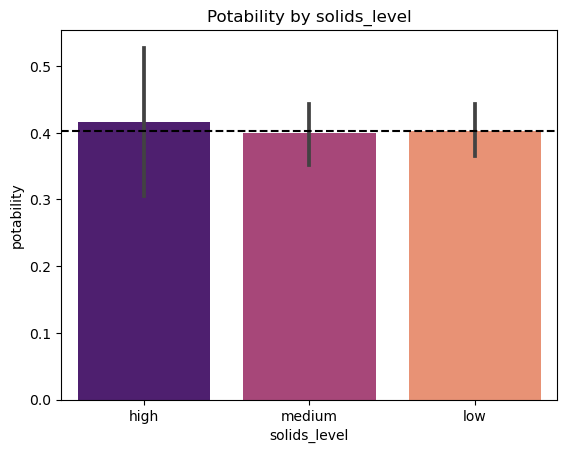

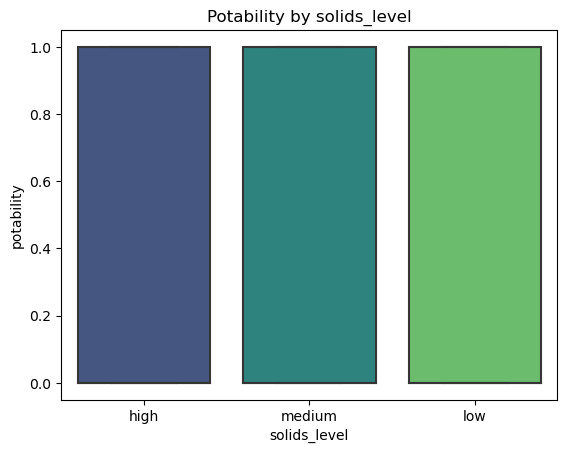

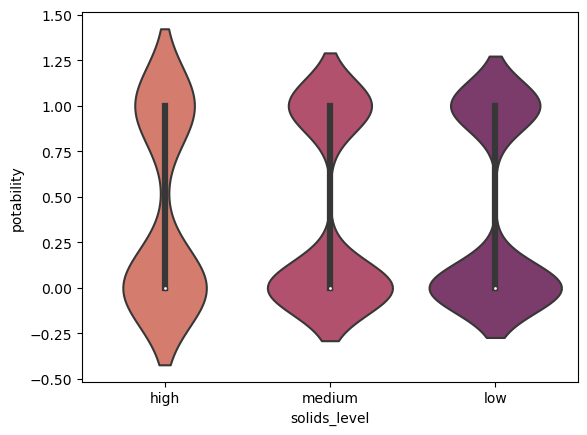

count     1125
unique       3
top        low
freq       610
Name: solids_level, dtype: object
-------------------------------
chloramines_level vs if potability


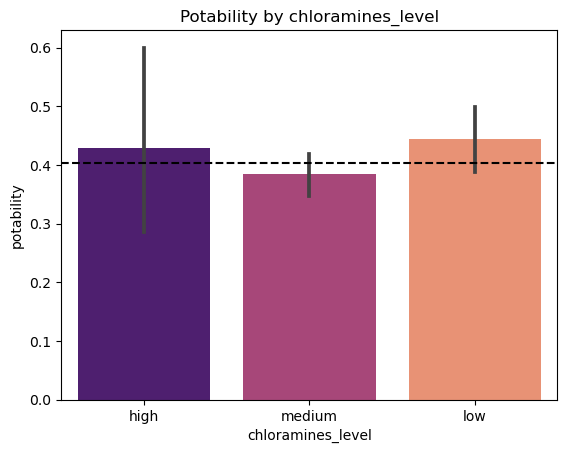

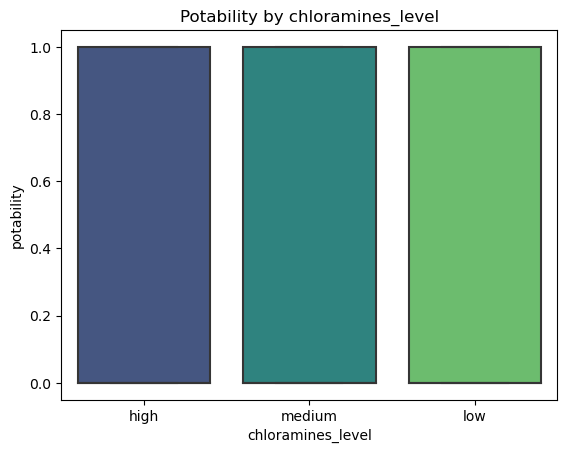

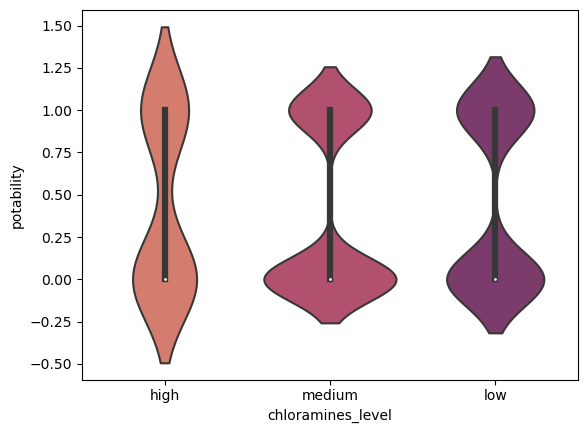

count       1124
unique         3
top       medium
freq         780
Name: chloramines_level, dtype: object
-------------------------------
sulfate_level vs if potability


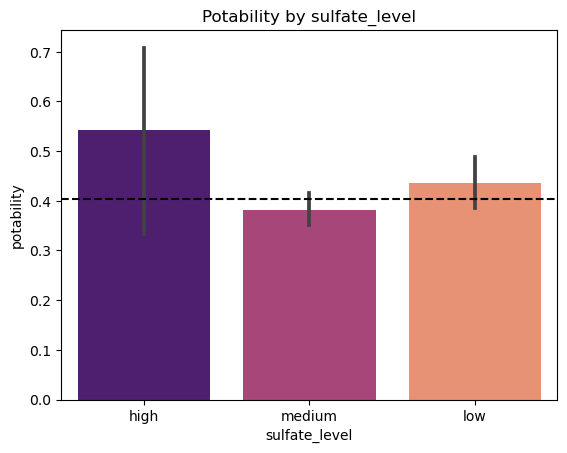

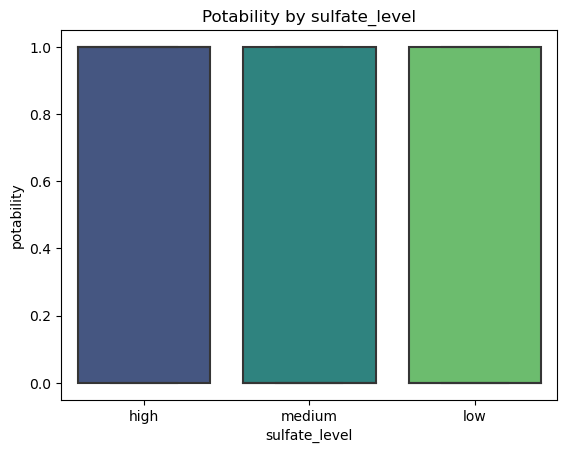

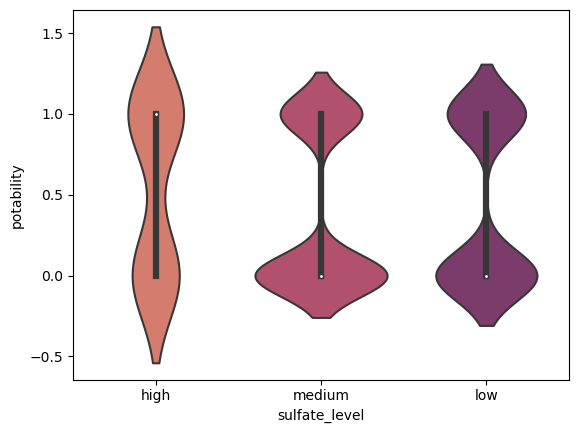

count       1125
unique         3
top       medium
freq         753
Name: sulfate_level, dtype: object
-------------------------------
conductivity_level vs if potability


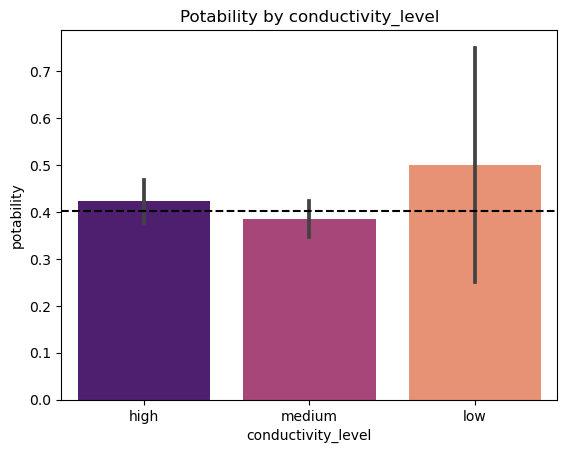

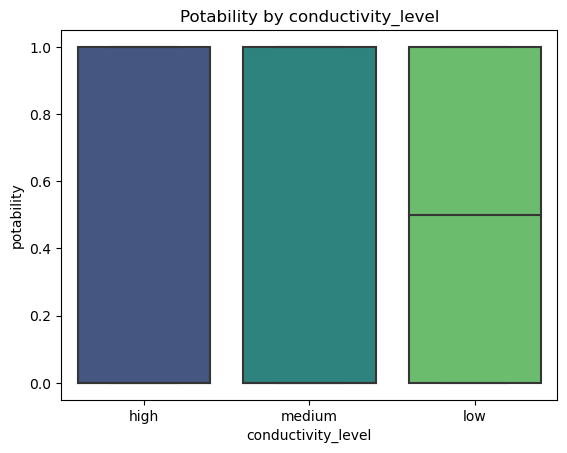

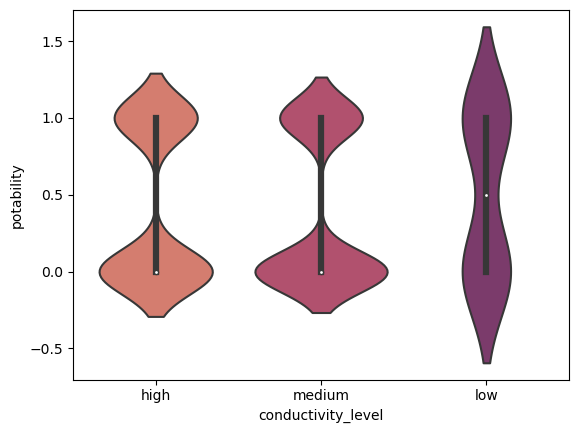

count       1124
unique         3
top       medium
freq         657
Name: conductivity_level, dtype: object
-------------------------------
oraganic_level vs if potability


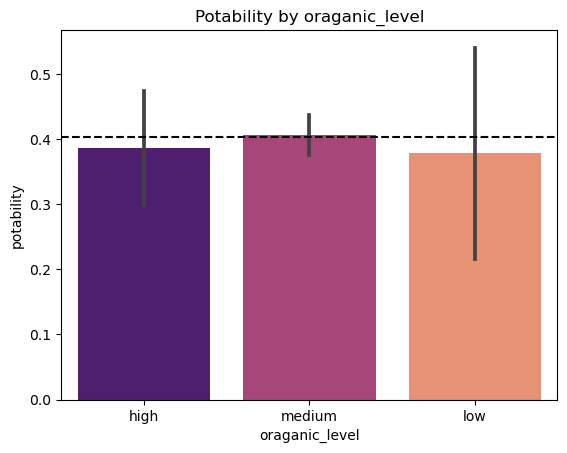

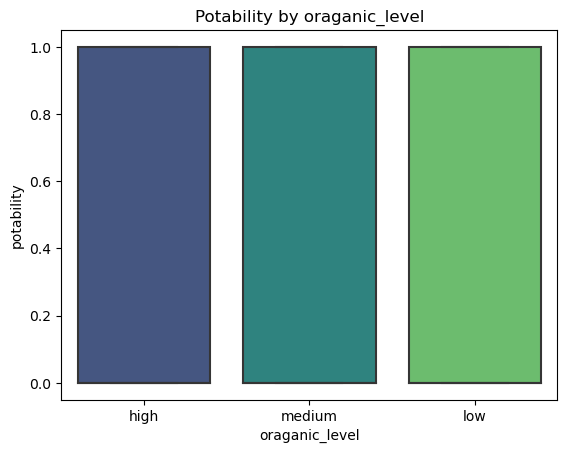

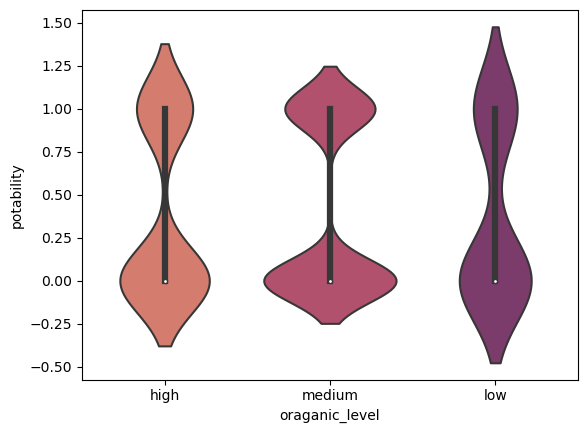

count       1125
unique         3
top       medium
freq         974
Name: oraganic_level, dtype: object
-------------------------------
trihalomethanes_level vs if potability


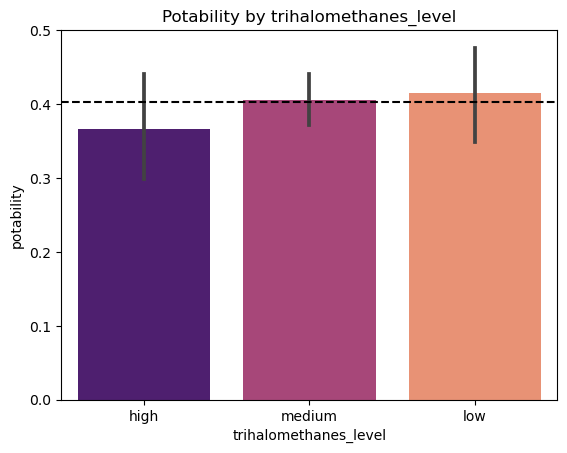

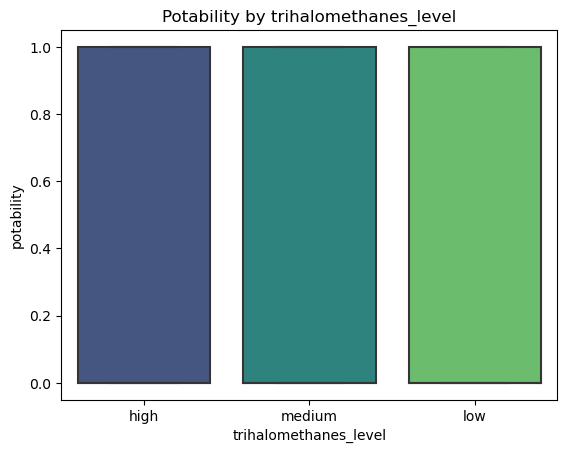

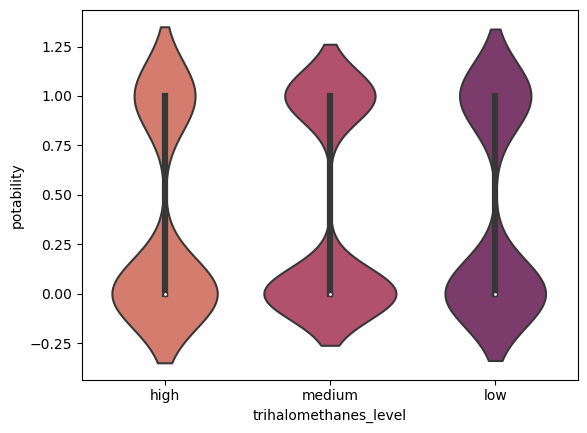

count       1124
unique         3
top       medium
freq         751
Name: trihalomethanes_level, dtype: object
-------------------------------
turbidity_level vs if potability


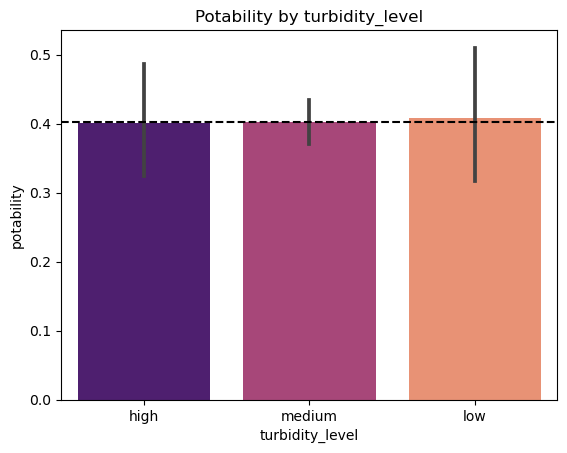

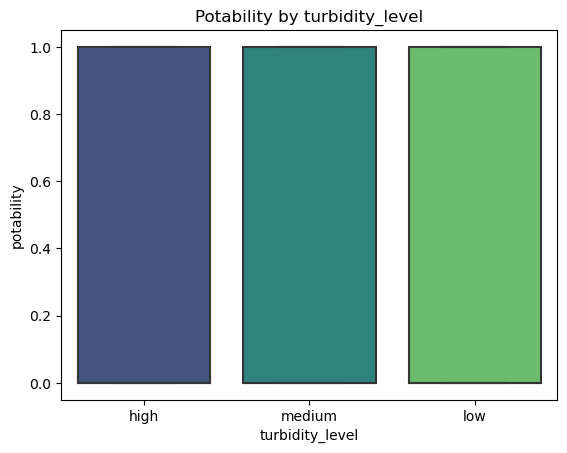

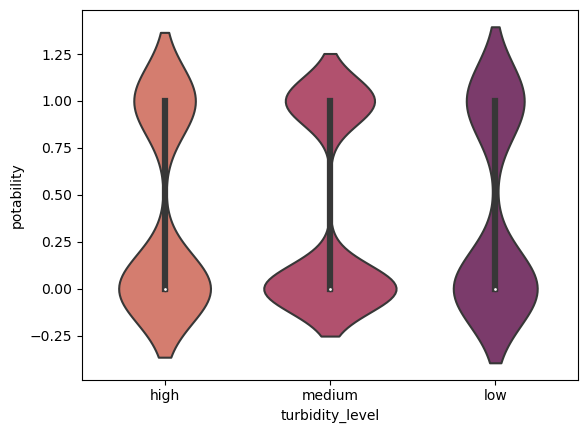

count       1124
unique         3
top       medium
freq         884
Name: turbidity_level, dtype: object
-------------------------------


In [10]:
# create a for loop to create all graphs
for col in cat_cols:
    if col != 'potability':
        print(f'{col} vs if potability')
        
        # barplot: 
        sns.barplot(data=train, x = col , y = 'potability' , palette = 'magma')
        plt.title(f'Potability by {col}')
        overall_rate = train['potability'].mean()
        plt.axhline(overall_rate, ls = '--', color = 'black')
        plt.show()
        
        #boxplot
        sns.boxplot(data=train, x = col , y = 'potability', palette = 'viridis')
        plt.title(f'Potability by {col}')
        plt.show()
        
        #violin plot
        sns.violinplot(data=train, x = col , y = 'potability', palette = 'flare')
        plt.show()
        
        print(train[col].describe())
        print('-------------------------------')

# Hypothesis 1: Is potability dependent on ph_range?
- Categorical vs categorical
- Chi2 test: 

In [11]:
null_hypothesis = 'ph_range and potability are independent of each other'
alternative_hypothesis = 'ph_range and potability are dependent on each other'

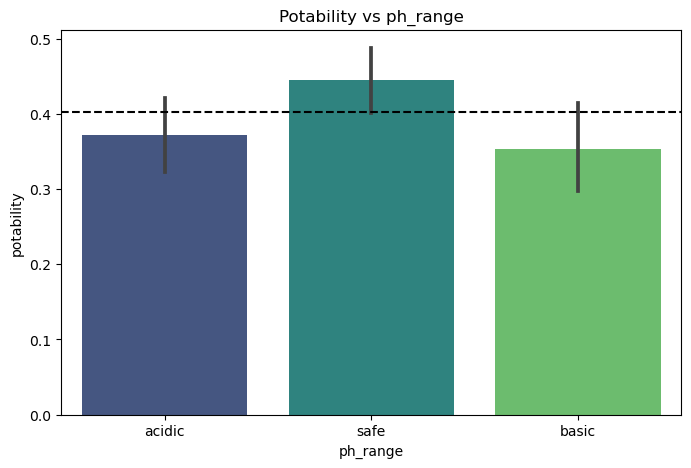

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(data = train, x = train.ph_range, y = 'potability', palette = 'viridis')
plt.title('Potability vs ph_range')
overall_rate = train['potability'].mean()
plt.axhline(overall_rate, ls = '--', color = 'black')
plt.show()

In [13]:
# Chi test: 
observed = pd.crosstab(train.ph_range, train['potability'])

chi2, p, degf, expected = stats.chi2_contingency(observed)

alpha = 0.05
if p < alpha:
    print(f"We reject the null hypothesis: {null_hypothesis}")
    print(f"Therefore: {alternative_hypothesis}")
else:
    print(f"We fail to reject the null, therefore: {null_hypothesis}")

We reject the null hypothesis: ph_range and potability are independent of each other
Therefore: ph_range and potability are dependent on each other


# Hypothesis 2: Is potability dependent on hardness_range? 
- Categorical vs categorical
- Chi2 test: 

In [14]:
null_hypothesis = 'hardness_range and potability are independent of each other'
alternative_hypothesis = 'hardness_range and potability are dependent on each other'

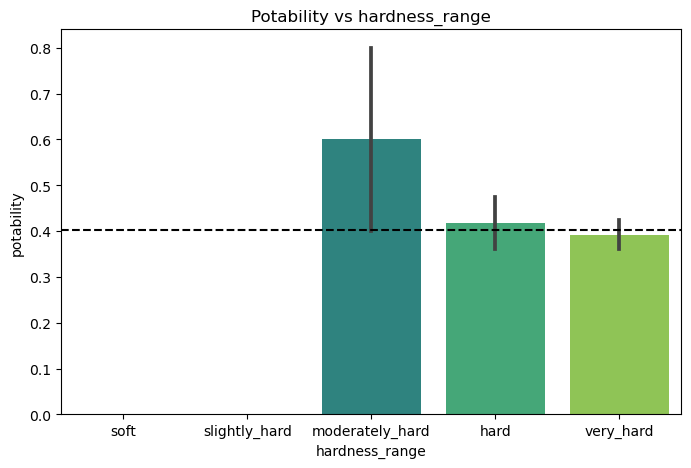

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(data = train, x = train.hardness_range, y = 'potability', palette = 'viridis')
plt.title('Potability vs hardness_range')
overall_rate = train['potability'].mean()
plt.axhline(overall_rate, ls = '--', color = 'black')
plt.show()

In [16]:
# Chi test: 
observed = pd.crosstab(train.hardness_range, train['potability'])

chi2, p, degf, expected = stats.chi2_contingency(observed)

alpha = 0.05
if p < alpha:
    print(f"We reject the null hypothesis: {null_hypothesis}")
    print(f"Therefore: {alternative_hypothesis}")
else:
    print(f"We fail to reject the null, therefore: {null_hypothesis}")

We fail to reject the null, therefore: hardness_range and potability are independent of each other


# Hypothesis 3: Is potability dependent on chloramines? 
- Categorical vs categorical
- Chi2 test: 

In [17]:
null_hypothesis = 'chloramines_range and potability are independent of each other'
alternative_hypothesis = 'chloramines_range and potability are dependent on each other'

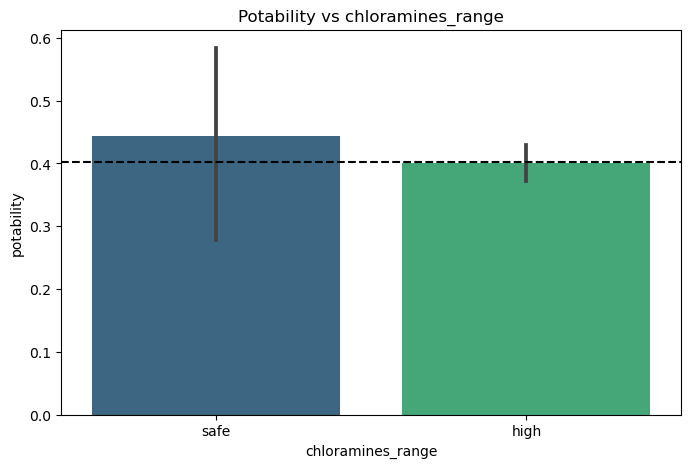

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(data = train, x = train.chloramines_range, y = 'potability', palette = 'viridis')
plt.title('Potability vs chloramines_range')
overall_rate = train['potability'].mean()
plt.axhline(overall_rate, ls = '--', color = 'black')
plt.show()

In [19]:
# Chi test: 
observed = pd.crosstab(train.hardness_range, train['potability'])

chi2, p, degf, expected = stats.chi2_contingency(observed)

alpha = 0.05
if p < alpha:
    print(f"We reject the null hypothesis: {null_hypothesis}")
    print(f"Therefore: {alternative_hypothesis}")
else:
    print(f"We fail to reject the null, therefore: {null_hypothesis}")

We fail to reject the null, therefore: chloramines_range and potability are independent of each other


# Hypothesis 3: Is potability dependent on sulfate_range?

In [20]:
null_hypothesis = 'sulfate_range and potability are independent of each other'
alternative_hypothesis = 'sulfate_range and potability are dependent on each other'

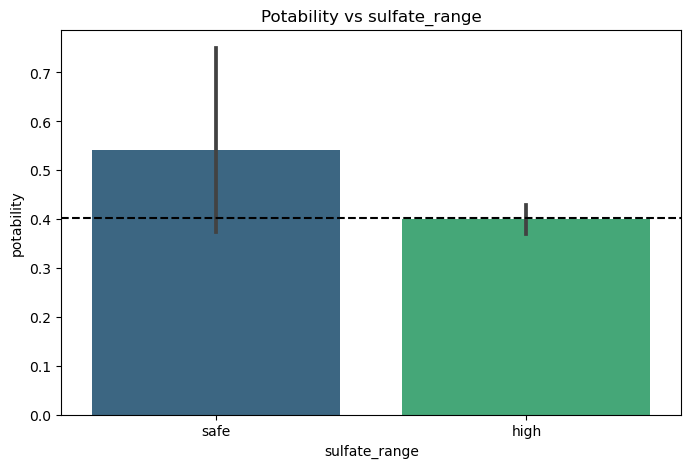

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(data = train, x = train.sulfate_range, y = 'potability', palette = 'viridis')
plt.title('Potability vs sulfate_range')
overall_rate = train['potability'].mean()
plt.axhline(overall_rate, ls = '--', color = 'black')
plt.show()

In [22]:
# Chi test: 
observed = pd.crosstab(train.sulfate_range, train['potability'])

chi2, p, degf, expected = stats.chi2_contingency(observed)

alpha = 0.05
if p < alpha:
    print(f"We reject the null hypothesis: {null_hypothesis}")
    print(f"Therefore: {alternative_hypothesis}")
else:
    print(f"We fail to reject the null, therefore: {null_hypothesis}")

We fail to reject the null, therefore: sulfate_range and potability are independent of each other


In [23]:
# complete a chi2 for each column
target = 'potability'
for col in cat_cols:
    if col != target:
        # create null and alternative
        print(f'Chi2 test of {col}')
        print(f'H0: {col} is indepndent of {target}')
        print(f'Ha: {col} is dependent of {target}')
        print('-------------------------------------')
        observed = pd.crosstab(train[col],train[target])
        chi2, p, defg, expected = stats.chi2_contingency(observed)
        print(f'''Observed:
        {observed.values}
    
        Expected:
        {expected.astype(int)}
        ________________
    
        ꭓ² = {chi2:.4f}
        p  = {p}''')
        print('-----------------')
        alpha = 0.05
        if p < alpha:
            print(f"""There exists some relationship between {col} and {target}.""")
            print(f'LOOK AT THIS DATA')
        else:
            print(f"""There is not a significant relationship between {col} and {target}.""")
        print('><><><><><><><><><><><><><><><><><')
    

Chi2 test of ph_range
H0: ph_range is indepndent of potability
Ha: ph_range is dependent of potability
-------------------------------------
Observed:
        [[243 144]
 [290 233]
 [139  76]]
    
        Expected:
        [[231 155]
 [312 210]
 [128  86]]
        ________________
    
        ꭓ² = 7.6564
        p  = 0.02174845987217803
-----------------
There exists some relationship between ph_range and potability.
LOOK AT THIS DATA
><><><><><><><><><><><><><><><><><
Chi2 test of hardness_range
H0: hardness_range is indepndent of potability
Ha: hardness_range is dependent of potability
-------------------------------------
Observed:
        [[  8  12]
 [175 125]
 [489 316]]
    
        Expected:
        [[ 11   8]
 [179 120]
 [480 324]]
        ________________
    
        ꭓ² = 3.8252
        p  = 0.14769804990254654
-----------------
There is not a significant relationship between hardness_range and potability.
><><><><><><><><><><><><><><><><><
Chi2 test of solids_range
H0: sol